In [0]:
#General library
import numpy as np 
import pandas as pd

#To get the list of data as well as file manipulation.
import os

#To get the distribution of the data
import seaborn as sns

#Plot tools to check the attributes(features of our data)
import matplotlib.pyplot as plt
%matplotlib inline

#Useful libraries imported for splitting the data using sklearn
#Useful libraries imported to see the model evaluation.
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Using Keras for classifcation task.
import keras 
from keras import optimizers
from keras.models import Sequential
from keras.layers.core import Dense, Activation

#This will be used for the clear the session.
import keras.backend as K

######## Tensor Board Code Taken from this url ######
#https://stackoverflow.com/questions/47818822/can-i-use-tensorboard-with-google-colab

!pip install tensorboardcolab

from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

#This will be for the Tensor_Board
from tensorflow.python.keras.callbacks import TensorBoard

#Make code to be reusable
np.random.seed(101)

In [0]:
#####Google Colab Connection & Data Aquisition #####
from google.colab import drive
drive.mount('/content/drive')


base_skin_dir = os.path.join("/content/drive/My Drive/Colab Notebooks/AI project/Input")
#Look at what is inside of the directory
!ls "/content/drive/My Drive/Colab Notebooks/AI project/Input/"

base_skin_dir = os.path.join("/content/drive/My Drive/Colab Notebooks/AI project/Input")

#We are going to take a look at the small pixels first in 28x28*3
skin_cancer_df = pd.read_csv(os.path.join(base_skin_dir, 'hmnist_28_28_RGB.csv'), lineterminator='\n')
#####################################################

#Error Occured if you are reading CSV file without the lineterminator

Mounted at /content/drive
HAM10000_metadata.csv  hmnist_28_28_RGB.csv  hmnist_8_8_RGB.csv
hmnist_28_28_L.csv     hmnist_8_8_L.csv


In [0]:
#It is important that your input sample shape
print(skin_cancer_df.shape)

#28*28*3 = 2352 pixels 0 through 2351
#Last column(label) correspond to the skin cancer types(7 of them)
#When we take a look this value, all the pixels are 
print(skin_cancer_df)

(10015, 2353)
       pixel0000  pixel0001  pixel0002  ...  pixel2350  pixel2351  label
0            192        153        193  ...        154        177      2
1             25         14         30  ...         14         27      2
2            192        138        153  ...        104        117      2
3             38         19         30  ...         12         15      2
4            158        113        139  ...         78         92      2
...          ...        ...        ...  ...        ...        ...    ...
10010        183        165        181  ...        187        189      0
10011          2          3          1  ...          4          1      0
10012        132        118        118  ...        151        145      0
10013        160        124        146  ...        162        172      0
10014        175        142        121  ...        139        126      6

[10015 rows x 2353 columns]


In [0]:
#Create the types of lesion for readability
lesion_type_dict = {
    0: '0: Actinic keratoses(akiec)',
    1: '1: Basal cell carcinoma(bcc)',
    2: '2: Benign keratosis-like lesions(bkl)',
    3: '3: Dermatofibroma(df)',
    4: '4: Melanocytic nevi(nv)',
    5: '5: Vascular lesions(vasc)',   
    6: '6: Melanoma(mel)',
}

In [0]:
#use map function to make our data-set as list.
skin_cancer_df['label'].map(lesion_type_dict).sample(10, random_state =1)
skin_cancer_df

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel2313,pixel2314,pixel2315,pixel2316,pixel2317,pixel2318,pixel2319,pixel2320,pixel2321,pixel2322,pixel2323,pixel2324,pixel2325,pixel2326,pixel2327,pixel2328,pixel2329,pixel2330,pixel2331,pixel2332,pixel2333,pixel2334,pixel2335,pixel2336,pixel2337,pixel2338,pixel2339,pixel2340,pixel2341,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,162,192,208,165,201,209,165,205,208,165,194,212,169,198,216,181,204,216,178,204,215,172,205,217,173,209,217,166,202,214,...,216,181,212,215,176,208,213,168,191,209,159,184,212,168,194,212,172,198,208,173,193,203,168,183,190,142,152,177,123,134,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,128,158,172,136,162,175,134,157,177,126,158,186,138,163,197,153,187,198,153,186,203,168,206,205,169,204,207,164,199,205,...,209,176,203,207,171,191,208,172,197,205,169,188,198,159,172,200,159,192,191,140,182,177,128,141,147,101,97,113,79,82,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,149,165,207,149,159,209,156,164,202,136,130,200,133,129,208,146,157,212,159,167,214,157,168,211,143,150,215,148,169,213,...,221,168,175,222,170,188,221,167,184,203,144,155,201,146,155,210,163,177,190,142,152,192,152,172,194,153,176,178,134,149,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,125,134,177,118,123,190,137,146,192,127,143,200,141,162,207,156,170,202,144,151,202,138,155,212,159,177,211,155,172,211,...,181,137,145,189,147,166,192,157,185,169,129,144,148,114,122,157,125,137,157,127,147,154,128,147,130,102,114,87,63,73,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,179,214,232,189,222,235,193,219,234,191,206,238,200,219,244,213,240,243,213,239,242,210,238,244,216,241,247,224,244,246,...,238,195,209,237,191,200,238,194,201,239,197,216,238,195,219,232,179,201,217,150,173,224,171,207,227,177,206,222,178,201,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,168,182,181,157,162,205,179,188,221,199,214,224,202,215,226,201,205,223,198,206,230,207,219,228,201,211,229,203,210,223,...,225,197,195,222,193,193,228,199,202,231,202,204,227,203,206,230,211,219,231,217,223,222,204,207,202,179,180,205,180,181,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,111,107,130,108,104,136,112,111,148,125,125,155,132,134,157,132,132,164,138,137,187,161,161,198,172,173,202,175,175,209,...,207,179,179,195,164,162,197,168,169,203,176,180,192,165,165,188,162,162,184,162,164,185,162,163,161,137,135,155,132,129,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,164,167,195,173,175,210,191,199,212,195,201,210,189,193,218,194,203,217,191,195,217,195,199,224,201,203,236,211,215,250,...,200,169,165,217,183,179,241,211,210,242,216,215,239,214,213,234,208,208,224,198,196,206,180,177,226,202,201,214,192,190,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,124,142,173,134,149,177,139,156,181,141,159,183,137,154,185,139,160,185,145,165,186,148,162,189,157,170,190,155,169,191,...,189,141,159,192,167,179,193,173,183,192,171,181,190,164,171,190,162,171,190,168,179,194,177,187,192,170,180,186,163,165,185,162,167,184,157,166,185,162,172,0

In [0]:
#Insert the lesion type as a label, so that we are able to see how input data are distributed
skin_cancer_df['lesion_type'] = skin_cancer_df['label'].map(lesion_type_dict)

In [0]:
#After reset the indexing, create each column by lesion type and count.
#Then count the number each lesion_type.
skin_df_count = pd.value_counts(skin_cancer_df['lesion_type']).reset_index()
skin_df_count.columns = ['lesion_type', 'count']
skin_df_count

,lesion_type,count
0,4: Melanocytic nevi(nv),6705
1,6: Melanoma(mel),1113
2,2: Benign keratosis-like lesions(bkl),1099
3,1: Basal cell carcinoma(bcc),514
4,0: Actinic keratoses(akiec),327
5,5: Vascular lesions(vasc),142
6,3: Dermatofibroma(df),115


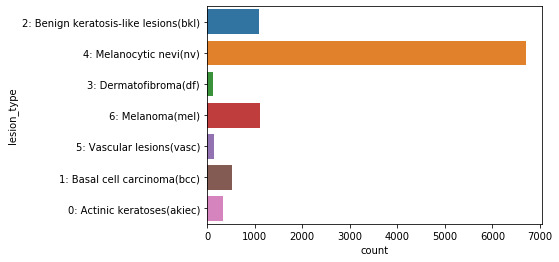

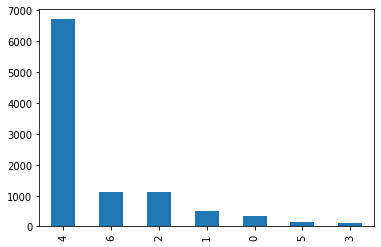

In [0]:
# 2) To graphically, how the input data are distributed.
plt.figure()
sns.countplot(y=skin_cancer_df['lesion_type'])

plt.figure()
skin_cancer_df['label'].value_counts().plot(kind='bar')

In [0]:
sample_df = skin_cancer_df.sample(10)

#To create the sample images, you have to get rid of second two last column
sample_df = sample_df.iloc[:,:-2].values

In [0]:
#Image is nothing but number.
#To plot the some sample data, reshaping the array is important.
sample_df = sample_df.reshape(10,28,28,3)

In [0]:
#We are collecting 10 samples, 28*28*3 data.
sample_df.shape

(10, 28, 28, 3)

In [0]:
#Plot Function to print how does images look like.
def plot_sample_skin(df, label_num):
  s_data = df[(df['label']==label_num)].sample(3, random_state=101).iloc[:,:-2].values.reshape((3,28,28,3))
  fig, ax = plt.subplots(1, 3, figsize=(28,3))

  for i in range(len(s_data)):
    ax[i].imshow(s_data[i])
    ax[i].set_title(lesion_type_dict.get(label_num))
  plt.show()

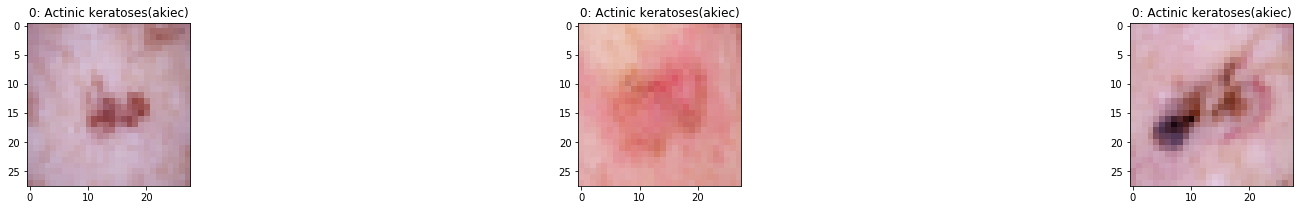

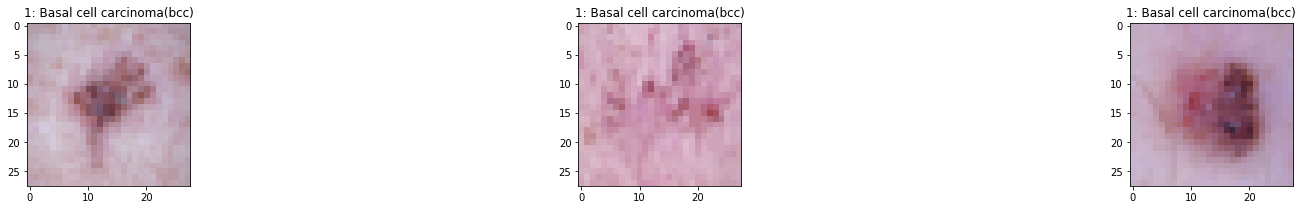

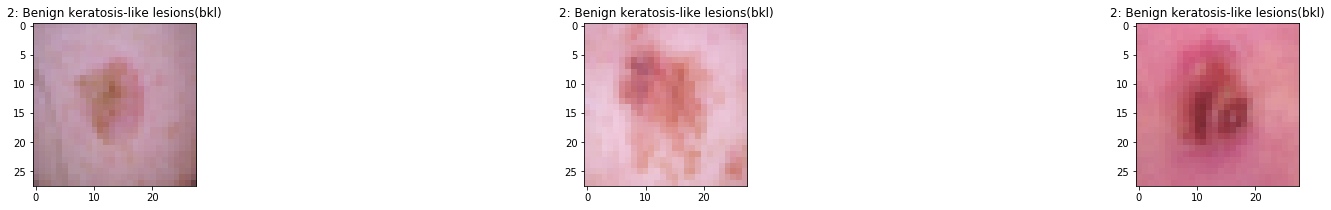

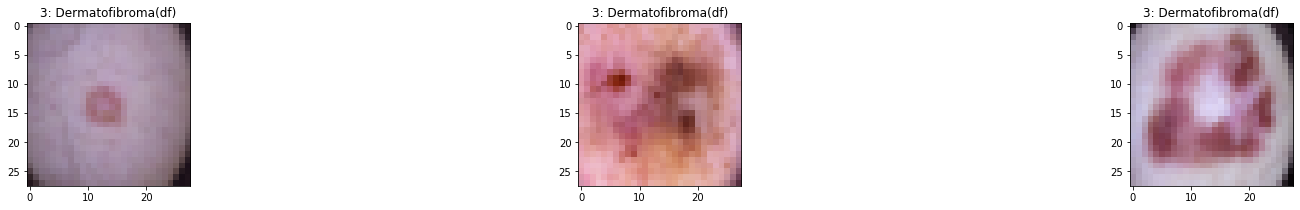

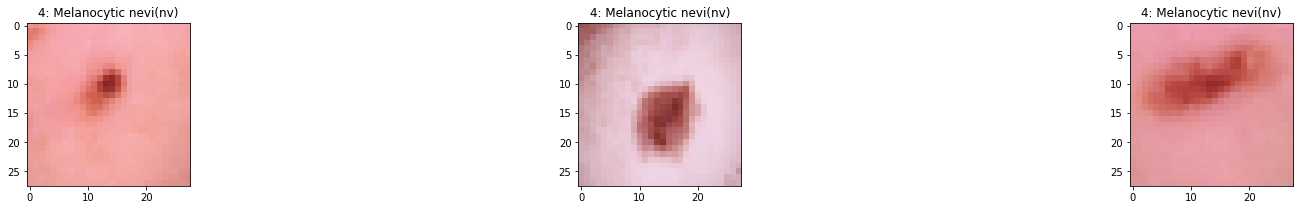

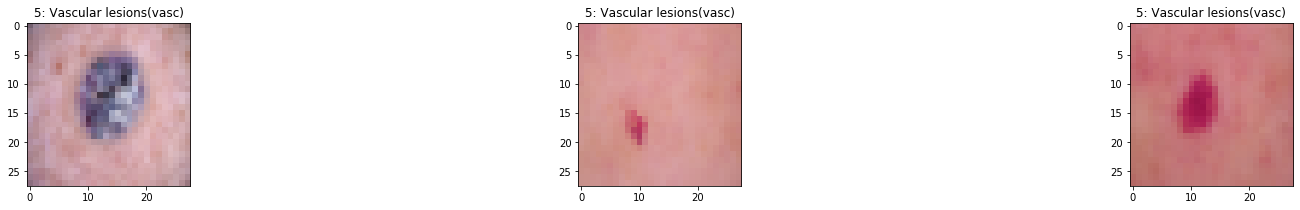

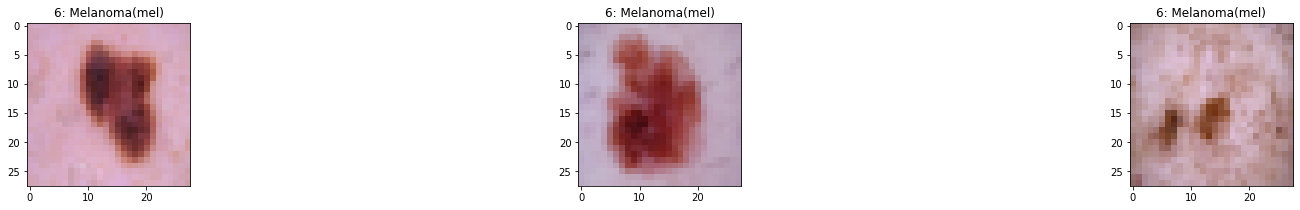

In [0]:
#from google.colab import files
for i in range(7):
  plot_sample_skin(skin_cancer_df, i)
  #plt.savefig("abc.jpeg")
  #files.download("abc.jpeg") 

In [0]:
#Now it's time to flatten out the traning set.
#Training/Testing Portion
#Building a model

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

#Sklearn library for split the train and test.
from sklearn.model_selection import train_test_split

In [0]:
X = skin_cancer_df.iloc[:,:-2].values
y = skin_cancer_df['label'].values

In [0]:
#look at the training shape and Test Labels for input. 
print(X.shape)
print(y.shape)

(10015, 2352)
(10015,)


In [0]:
#One Hot encoded for each label(last column)->Output Feature
y_one_hot_encoded = pd.get_dummies(y).values

In [0]:
#Look at the one-hot encoded shape.
y_one_hot_encoded.shape

(10015, 7)

In [0]:
y_one_hot_encoded

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [0]:
#Split the train test set 
x_train, x_test, y_train, y_test = train_test_split(X, y_one_hot_encoded, test_size=0.3
                                                    ,random_state = 101)

In [0]:
#Check the training shape 
print(x_train.shape)

(7010, 2352)


(10015, 28, 28, 3)


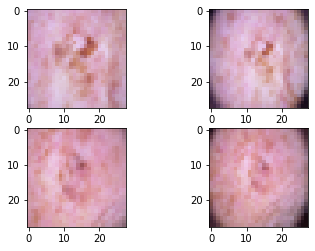

In [0]:
#This reshape will be used in the Convolutional Neural Network
#But it is good to show what the training images look like
X_reshape = X.reshape((-1,28,28,3)) #Same as 10015, 28, 28 ,3
print(X_reshape.shape)

#Let's take a look at what is our training data looks like
plt.subplot(221)
plt.imshow(X_reshape[0])
plt.subplot(222)
plt.imshow(X_reshape[1])
plt.subplot(223)
plt.imshow(X_reshape[2])

plt.subplot(224)
plt.imshow(X_reshape[3])
plt.show()

In [0]:
#When you feeding into the model, you use flatten pixel values for input X.
num_pixel = 2352
x_train = x_train.reshape(x_train.shape[0], num_pixel).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixel).astype('float32')

#Normallizing the data. (Can add more into it)
#255+255+255 = 765 
x_train_mean = np.mean(x_train)
#print(x_train_mean)
x_train_std = np.std(x_train)
#print(x_train_std)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

#Use standard normalization Technique.
x_train = (x_train - x_train_mean)/(x_train_std)
x_test = (x_test - x_test_mean)/(x_test_std)

In [0]:
x_train.shape

(7010, 2352)

In [0]:
x_train

array([[ 1.694077  ,  0.06664836,  0.348736  , ...,  1.0214065 ,
        -0.45412883, -0.69281834],
       [ 1.3685913 , -0.34563357,  0.2185417 , ...,  1.3251932 ,
        -0.10694404,  0.3053379 ],
       [ 1.5638827 ,  0.08834741,  0.56572646, ...,  1.1299018 ,
        -0.06354593,  0.06664836],
       ...,
       [ 0.08834741, -0.43242976, -0.17204118, ..., -0.36733264,
        -0.99660504, -0.9315079 ],
       [ 0.804416  ,  0.24024075,  0.4789303 , ...,  0.8912122 ,
         0.3921341 ,  0.6525227 ],
       [-0.12864308, -0.41073072,  0.04494931, ..., -1.3220907 ,
        -1.6041784 , -1.2569937 ]], dtype=float32)

In [0]:
x_test.shape

(3005, 2352)

In [0]:
y_train.shape

(7010, 7)

In [0]:
#Before using the smote
df_before = pd.DataFrame(y_train)

df_before.columns = ['0', '1', '2', '3','4','5','6']

count_0_before = df_before['0'].value_counts()
count_1_before = df_before['1'].value_counts()
count_2_before = df_before['2'].value_counts()
count_3_before = df_before['3'].value_counts()
count_4_before = df_before['4'].value_counts()
count_5_before = df_before['5'].value_counts()
count_6_before = df_before['6'].value_counts()

print(count_0_before)
print(count_1_before)
print(count_2_before)
print(count_3_before)
print(count_4_before)
print(count_5_before)
print(count_6_before)

0    6769
1     241
Name: 0, dtype: int64
0    6654
1     356
Name: 1, dtype: int64
0    6243
1     767
Name: 2, dtype: int64
0    6926
1      84
Name: 3, dtype: int64
1    4702
0    2308
Name: 4, dtype: int64
0    6906
1     104
Name: 5, dtype: int64
0    6254
1     756
Name: 6, dtype: int64


In [0]:
#After I trained, I have a 67% Accuracy -> How would I be able to check whether this accuracy is valid or not.
#Confusion matrix 
#Weight Balancing   -> If the data is imbalanced.
#Use SMOTE(Synthetic minority oversampling technique)
#and Do not SMOTE on the test data.

from imblearn.over_sampling import SMOTE
#you can set the ratio
sm = SMOTE(random_state = 0)
x_train_re, y_train_re = sm.fit_sample(x_train, y_train)

In [0]:
#After the SMOTE applied.
df1 = pd.DataFrame(y_train_re)
df1.columns = ['0', '1', '2', '3','4','5','6']
count_0 = df1['0'].value_counts()
count_1 = df1['1'].value_counts()
count_2 = df1['2'].value_counts()
count_3 = df1['3'].value_counts()
count_4 = df1['4'].value_counts()
count_5 = df1['5'].value_counts()
count_6 = df1['6'].value_counts()

print(count_0)
print(count_1)
print(count_2)
print(count_3)
print(count_4)
print(count_5)
print(count_6)

0    28212
1     4702
Name: 0, dtype: int64
0    28212
1     4702
Name: 1, dtype: int64
0    28212
1     4702
Name: 2, dtype: int64
0    28212
1     4702
Name: 3, dtype: int64
0    28212
1     4702
Name: 4, dtype: int64
0    28212
1     4702
Name: 5, dtype: int64
0    28212
1     4702
Name: 6, dtype: int64


In [0]:
#Build Simple Model(Base Model) Feed Forward neural Network
#But not create a lot because input feature would not affect the output feature anymore if there are so many layers
num_pixel = 2352
num_class = 7 

model = Sequential()
model.add(Dense(8, input_dim=num_pixel, kernel_initializer='normal', activation='relu'))
model.add(Dense(32,kernel_initializer='normal', activation='relu'))
model.add(Dense(32,kernel_initializer='normal', activation='relu'))
model.add(Dense(32,kernel_initializer='normal', activation='relu'))
model.add(Dense(16, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_class, kernel_initializer='normal', activation='softmax'))
model.summary()

#Tensorboard -> To look how each neurons or layers interactive each other with input data.
tensor_board = TensorBoardColab()


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 18824     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 119       
Total params: 21,871
Trainable params: 21,871
Non-trainable params: 0
__________________________________________________

In [0]:
history = model.fit(x_train_re, y_train_re, validation_data=(x_test, y_test), epochs=20, batch_size=246, verbose=2, callbacks=[TensorBoardColabCallback(tensor_board)])

Train on 32914 samples, validate on 3005 samples
Epoch 1/20
 - 1s - loss: 1.7884 - acc: 0.2379 - val_loss: 1.5926 - val_acc: 0.4087
Epoch 2/20
 - 1s - loss: 1.5954 - acc: 0.3156 - val_loss: 1.3025 - val_acc: 0.4982
Epoch 3/20
 - 1s - loss: 1.4578 - acc: 0.3790 - val_loss: 1.3880 - val_acc: 0.4659
Epoch 4/20
 - 1s - loss: 1.2873 - acc: 0.4593 - val_loss: 1.2918 - val_acc: 0.5025
Epoch 5/20
 - 1s - loss: 1.0979 - acc: 0.5330 - val_loss: 1.2259 - val_acc: 0.5195
Epoch 6/20
 - 1s - loss: 0.9879 - acc: 0.5876 - val_loss: 1.2668 - val_acc: 0.5221
Epoch 7/20
 - 1s - loss: 0.9091 - acc: 0.6245 - val_loss: 1.2030 - val_acc: 0.5361
Epoch 8/20
 - 1s - loss: 0.8539 - acc: 0.6620 - val_loss: 1.2752 - val_acc: 0.5278
Epoch 9/20
 - 1s - loss: 0.7874 - acc: 0.6950 - val_loss: 1.3439 - val_acc: 0.5118
Epoch 10/20
 - 1s - loss: 0.7529 - acc: 0.7114 - val_loss: 1.3866 - val_acc: 0.5072
Epoch 11/20
 - 1s - loss: 0.6812 - acc: 0.7466 - val_loss: 1.4734 - val_acc: 0.5012
Epoch 12/20
 - 1s - loss: 0.6488 - a

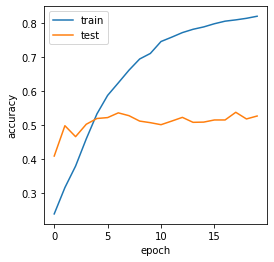

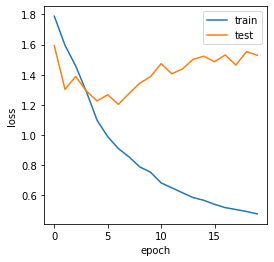

In [0]:
##This portion of code was used from Logistic_Regression_Example.
plt.figure(figsize=(4,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [0]:
prediction = model.predict(x_test)

In [0]:
print(prediction.shape)

(3005, 7)


In [0]:
prediction[:5].round()

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [0]:
y_test[:5].round()

array([[0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

In [0]:
prediction = prediction.round()

In [0]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score( y_test, prediction, average='micro')
recall = recall_score(y_test, prediction, average='micro')
f1score = f1_score(y_test, prediction, average='micro')

In [0]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Accuracy: 48.75%
Precision: 56.59%
Recall: 48.75%
F1-score: 0.52


# Things can be accomplished.
1. What about different optimizers or different Activation
2. Different Weight Initializer.
  1. Maybe Xavier.
3. It seems then it's overfitting(Can you regularize ?)
  1.   Dropout Layers
  2.   L1 and L2 Regularization.

4. Can you build different Architecture within MNIST Data Set.
  1.   CNN(Convolution Neural Network) -> Would this improve the overfitting problem? 
  2.   Residual Neural Network -> Same Question as CNN. Compared to CNN, what was difference between CNN.
  3.   Data Augmentation. Use ImageDataGen

In [0]:
#To make my learning curve general I used L2 Regularization and Dropout
#How the L2 Regularization works is following
# cost = 1/n * Sum{L(yi, y_hat_i) + (lambda*weight^2)/2}
#This will make my learning curve more smoother.

#Dropout Definition : 
K.clear_session()

model = Sequential()
model.add(Dense(8, input_dim=num_pixel, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32,kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32,kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dense(16, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_class, kernel_initializer='normal', activation='softmax'))
model.summary()

#Tensorboard -> To look how each neurons or layers interactive each other with input data.
tensor_board = TensorBoardColab()


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 18824     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                288       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 16)               

In [0]:
history1 = model.fit(x_train_re, y_train_re, validation_data=(x_test, y_test), epochs=20, batch_size=246, verbose=2, callbacks=[TensorBoardColabCallback(tensor_board)])

Train on 32914 samples, validate on 3005 samples
Epoch 1/20
 - 1s - loss: 1.7807 - acc: 0.2593 - val_loss: 1.5421 - val_acc: 0.3161
Epoch 2/20
 - 1s - loss: 1.4072 - acc: 0.4311 - val_loss: 1.2877 - val_acc: 0.5065
Epoch 3/20
 - 1s - loss: 1.1794 - acc: 0.5122 - val_loss: 1.2037 - val_acc: 0.5278
Epoch 4/20
 - 1s - loss: 1.0847 - acc: 0.5445 - val_loss: 1.3179 - val_acc: 0.5052
Epoch 5/20
 - 1s - loss: 1.0154 - acc: 0.5741 - val_loss: 1.3474 - val_acc: 0.4955
Epoch 6/20
 - 1s - loss: 0.9495 - acc: 0.5996 - val_loss: 1.2357 - val_acc: 0.5171
Epoch 7/20
 - 1s - loss: 0.8791 - acc: 0.6272 - val_loss: 1.1867 - val_acc: 0.5211
Epoch 8/20
 - 1s - loss: 0.8319 - acc: 0.6497 - val_loss: 1.3652 - val_acc: 0.5012
Epoch 9/20
 - 1s - loss: 0.7869 - acc: 0.6729 - val_loss: 1.3751 - val_acc: 0.5058
Epoch 10/20
 - 1s - loss: 0.7447 - acc: 0.6971 - val_loss: 1.2943 - val_acc: 0.5138
Epoch 11/20
 - 1s - loss: 0.6935 - acc: 0.7268 - val_loss: 1.4029 - val_acc: 0.4659
Epoch 12/20
 - 1s - loss: 0.6640 - a

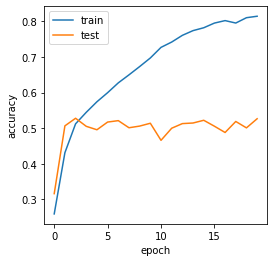

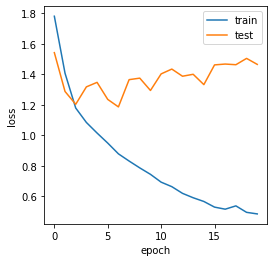

In [0]:
##This portion of code was used from Logistic_Regression_Example.
plt.figure(figsize=(4,4))
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


plt.figure(figsize=(4,4))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [0]:
prediction_1 = model.predict(x_test)
prediction_1 = prediction_1.round()

In [0]:
accuracy_1 = accuracy_score(y_test, prediction_1)
precision_1 = precision_score( y_test, prediction_1, average='micro')
recall_1 = recall_score(y_test, prediction_1, average='micro')
f1score_1 = f1_score(y_test, prediction_1, average='micro')

print("Accuracy: %.2f%%" % (accuracy_1 * 100.0))
print("Precision: %.2f%%" % (precision_1 * 100.0))
print("Recall: %.2f%%" % (recall_1 * 100.0))
print("F1-score: %.2f" % (f1score_1* 100.0))

Accuracy: 49.55%
Precision: 56.38%
Recall: 49.55%
F1-score: 52.75


# Pre-Processing

As the MNIST Data

In [0]:
#X is already reshaped
X_train, X_test, Y_train, Y_test = train_test_split(X_reshape, y, test_size=0.3, random_state =101)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
import tensorflow as tf
Y_train =  tf.keras.utils.to_categorical(Y_train, num_class)
Y_test = tf.keras.utils.to_categorical(Y_test, num_class)

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7010, 28, 28, 3)
(7010, 7)
(3005, 28, 28, 3)
(3005, 7)


In [0]:
#Convolutional Neural Network
from keras import optimizers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [0]:
#The code was mostly taken from https://keras.io/examples/mnist_cnn/.
#Description : CNN(Convolutional Neural Network
#            : 32 Channels(Filter was used) with Kernel_size of 3x3 matrics with one strides.
#            : Padding same option will be same 
img_rows = 28
img_cols = 28

input_shape = (img_rows, img_cols, 3)

K.clear_session()

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1,1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_class, activation='softmax'))
model.summary()

# initiate RMSprop optimizer
optimizer = keras.optimizers.RMSprop(lr=0.001, decay=1e-6)

#Tensorboard -> To look how each neurons or layers interactive each other with input data.
tensor_board = TensorBoardColab()


model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

history2 = model.fit(X_train, Y_train,
                     batch_size=32,
                     epochs=30,
                     validation_data=(X_test, Y_test), 
                     callbacks=[TensorBoardColabCallback(tensor_board)])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

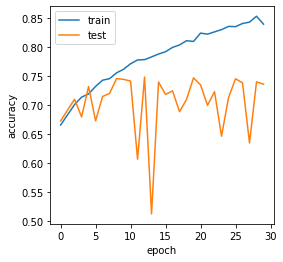

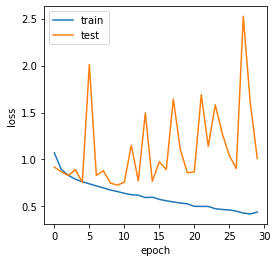

In [0]:
plt.figure(figsize=(4,4))
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


plt.figure(figsize=(4,4))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [0]:
prediction_2 = model.predict(X_test)
prediction_2 = prediction_2.round()

accuracy_2 = accuracy_score(y_test, prediction_2)
precision_2 = precision_score( y_test, prediction_2, average='micro')
recall_2 = recall_score(y_test, prediction_2, average='micro')
f1score_2 = f1_score(y_test, prediction_2, average='micro')

print("Accuracy: %.2f%%" % (accuracy_2 * 100.0))
print("Precision: %.2f%%" % (precision_2 * 100.0))
print("Recall: %.2f%%" % (recall_2 * 100.0))
print("F1-score: %.2f" % (f1score_2* 100.0))


Accuracy: 71.08%
Precision: 76.18%
Recall: 71.08%
F1-score: 73.54


Confusion matrix, without normalization


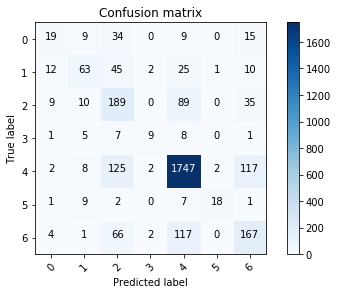

In [0]:
#To plot the confusion matrix.
#This code was found in sklearn built-in Function
#https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html

#Function to plot the confusion matrix.
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_prediction = model.predict(X_test)
Y_prediction_class = np.argmax(Y_prediction, axis = 1)
Y_true_label = np.argmax(Y_test, axis = 1)

confusion_matx = confusion_matrix(Y_true_label, Y_prediction_class)

plot_confusion_matrix(confusion_matx, classes= range(7), normalize=False)

In [0]:
#This is going to be my last attempt to overcome the imbalanced data
#This section will be different 
#because I will generate the data using preprocessing library provided in keras
#Which is augment the data, so that it would possibly be helpful to cope with 
#imbalanced data.

#Some of the code was taken from this webpage https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator

#Train/Validation/Test Split. 60% : 10 % : 30 % Ratio.
#Using the CNN Again. 

#Train and Test split 70% : 30 %
#This code was above as well as one_hot encoding.
#X_train, X_test, Y_train, Y_test = train_test_split(X_reshape, y, test_size=0.3, random_state =101)


#Then split the train and validation set 60 % : 10 % ratio.
X_CNN_train, X_CNN_valid, y_CNN_train, y_CNN_valid = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 101)

print(X_CNN_train.shape)
print(X_CNN_valid.shape)
print(y_CNN_train.shape)
print(y_CNN_valid.shape)

(6309, 28, 28, 3)
(701, 28, 28, 3)
(6309, 7)
(701, 7)


In [0]:
#The code was mostly taken from https://keras.io/examples/mnist_cnn/.
#                           and https://keras.io/layers/convolutional/
#Description : CNN(Convolutional Neural Network
#            : 32 Channels(Filter was used) with Kernel_size of 3x3 matrics with one strides.
#            : Padding same option will be same -> padding around the images.
#            : Activation 
img_rows = 28
img_cols = 28

input_shape = (img_rows, img_cols, 3)

K.clear_session()

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), 
                 padding='same', 
                 activation='relu',
                 kernel_initializer='he_uniform',
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size=(3,3), 
                 padding='same',
                 activation='relu',
                 kernel_initializer='he_uniform'))
model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 kernel_initializer='he_uniform'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))
model.summary()

# initiate RMSprop optimizer
optimizer = keras.optimizers.RMSprop(lr=0.001, decay=1e-6)

#Tensorboard -> To look how each neurons or layers interactive each other with input data.
tensor_board = TensorBoardColab()


model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [0]:
data_train_gen = ImageDataGenerator(
        featurewise_center=False,             # set input mean to 0 over the dataset
        samplewise_center=False,              # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,   # divide each input by its std
        zca_whitening=False,                  # apply ZCA whitening
        rotation_range=10,                    # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1,                     # Randomly zoom image 
        width_shift_range=0.1,                # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,               # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,                # randomly flip images
        vertical_flip=False)                  # randomly flip images

data_train_gen.fit(X_CNN_train)

In [0]:
history3 = model.fit(data_train_gen.flow(X_CNN_train, y_CNN_train, batch_size=32),
                     epochs=30,
                     validation_data=(X_CNN_valid, y_CNN_valid), 
                     callbacks=[TensorBoardColabCallback(tensor_board)])

Epoch 1/30
198/198 [==============================] - 21s 107ms/step - loss: 1.1474 - acc: 0.6633 - val_loss: 0.9656 - val_acc: 0.6633
Epoch 2/30
198/198 [==============================] - 21s 106ms/step - loss: 0.9702 - acc: 0.6689 - val_loss: 0.9151 - val_acc: 0.6591
Epoch 3/30
198/198 [==============================] - 21s 105ms/step - loss: 0.9368 - acc: 0.6781 - val_loss: 0.9462 - val_acc: 0.6562
Epoch 4/30
198/198 [==============================] - 21s 105ms/step - loss: 0.9175 - acc: 0.6777 - val_loss: 0.9042 - val_acc: 0.6805
Epoch 5/30
198/198 [==============================] - 21s 105ms/step - loss: 0.9034 - acc: 0.6871 - val_loss: 0.9195 - val_acc: 0.6790
Epoch 6/30
198/198 [==============================] - 21s 105ms/step - loss: 0.8918 - acc: 0.6849 - val_loss: 0.8242 - val_acc: 0.7061
Epoch 7/30
198/198 [==============================] - 21s 105ms/step - loss: 0.8823 - acc: 0.6905 - val_loss: 0.8241 - val_acc: 0.7090
Epoch 8/30
198/198 [==============================] - 2

In [0]:
loss1, accuracy_3 = model.evaluate(X_test, Y_test, verbose=1)
loss_validation, accuracy_3_validation = model.evaluate(X_CNN_valid, y_CNN_valid, verbose=1)

701/701 [==============================] - 0s 702us/step


In [0]:
print("Validation Accuracy : %f " % accuracy_3_validation)

Validation Accuracy : 0.704708 


In [0]:
print("Test Accuracy : %f " %accuracy_3)

Test Accuracy : 0.708486 


In [0]:
from google.colab import files

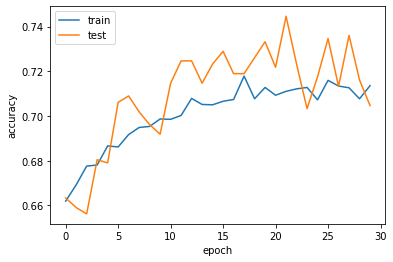

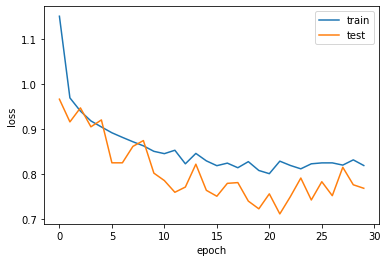

In [0]:
fig = plt.figure()
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.figure()
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Confusion matrix, without normalization


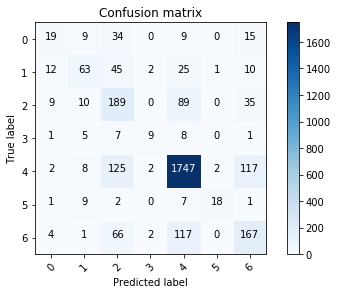

In [0]:
Y_prediction_CNN = model.predict(X_test)
Y_prediction_CNN_class = np.argmax(Y_prediction, axis = 1)
Y_true_label_CNN = np.argmax(Y_test, axis = 1)

confusion_matx_CNN = confusion_matrix(Y_true_label_CNN, Y_prediction_CNN_class)

plot_confusion_matrix(confusion_matx_CNN, classes= range(7), normalize=False)

In [165]:
prediction_3 = model.predict(X_test)
prediction_3 = prediction_3.round()

accuracy_3 = accuracy_score(Y_test, prediction_3)
precision_3 = precision_score(Y_test, prediction_3, average='micro')
recall_3 = recall_score(Y_test, prediction_3, average='micro')
f1score_3 = f1_score(Y_test, prediction_3, average='micro')

print("Accuracy: %.2f%%" % (accuracy_2 * 100.0))
print("Precision: %.2f%%" % (precision_2 * 100.0))
print("Recall: %.2f%%" % (recall_2 * 100.0))
print("F1-score: %.2f" % (f1score_2* 100.0))


Accuracy: 71.08%
Precision: 76.18%
Recall: 71.08%
F1-score: 73.54
